# Activity 1: Classify Images of clothing

In [48]:
import tensorflow as tf
from tensorflow import keras 

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [49]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [51]:
train_images.shape

(60000, 28, 28)

In [52]:
len(train_labels)

60000

In [53]:
test_images.shape

(10000, 28, 28)

In [54]:
print(train_labels)

[9 0 0 ... 3 0 5]


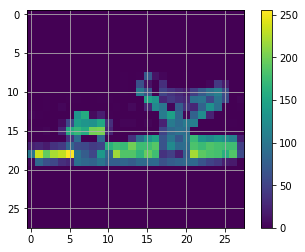

In [55]:
plt.figure()
plt.imshow(train_images[len(train_images)-1])
plt.colorbar()
plt.grid(True)
plt.show()

In [56]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

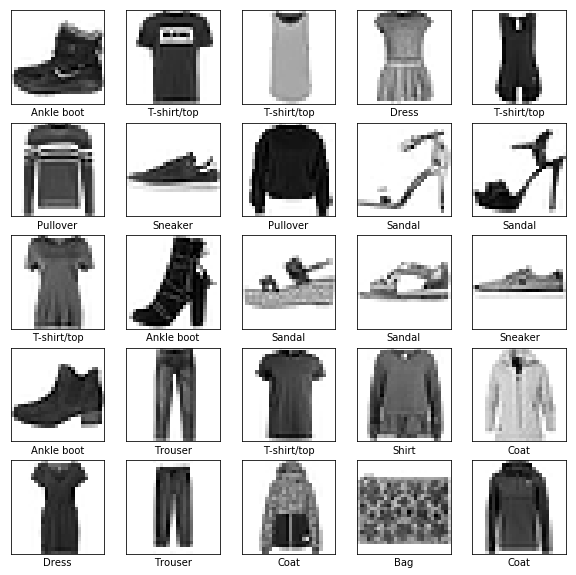

In [57]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [58]:
p_model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

p_model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

p_model.fit(train_images, train_labels, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5044 - accuracy: 0.8223
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3780 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3388 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3147 - accuracy: 0.8855: 0s - loss: 0.3153 - accuracy: 0.88
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2965 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2815 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2694 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2574 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2490 - accuracy: 0.9083
Epoch 10/10
1875/1875 [=======================

In [59]:
test_loss, test_acc = p_model.evaluate(test_images, test_labels, verbose = 2)
print("\n Test Accuracy: " + str(test_acc))

313/313 - 0s - loss: 0.3276 - accuracy: 0.8863

 Test Accuracy: 0.8863000273704529


In [60]:
probability_model = tf.keras.Sequential([p_model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

print(predictions[0])

[1.9677479e-06 1.2944988e-10 3.4241159e-09 4.0185835e-08 9.8611245e-08
 6.3922588e-04 3.1329327e-07 5.5340361e-03 7.0979655e-07 9.9382365e-01]


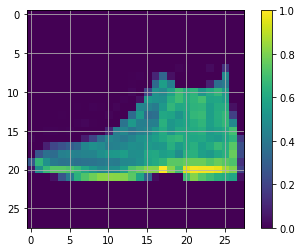

Most likely: Ankle boot


In [61]:
# checks out that it's an ankle boot
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

print("Most likely: "+ str(class_names[np.argmax(predictions[0])]))

In [62]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



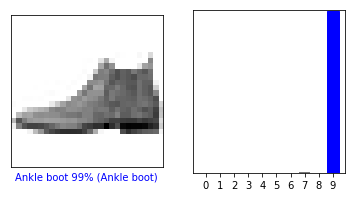

In [63]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

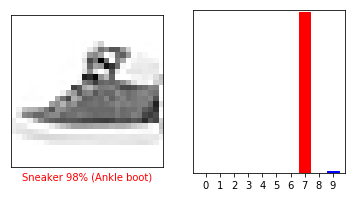

In [64]:
# wrong example
i = 68
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

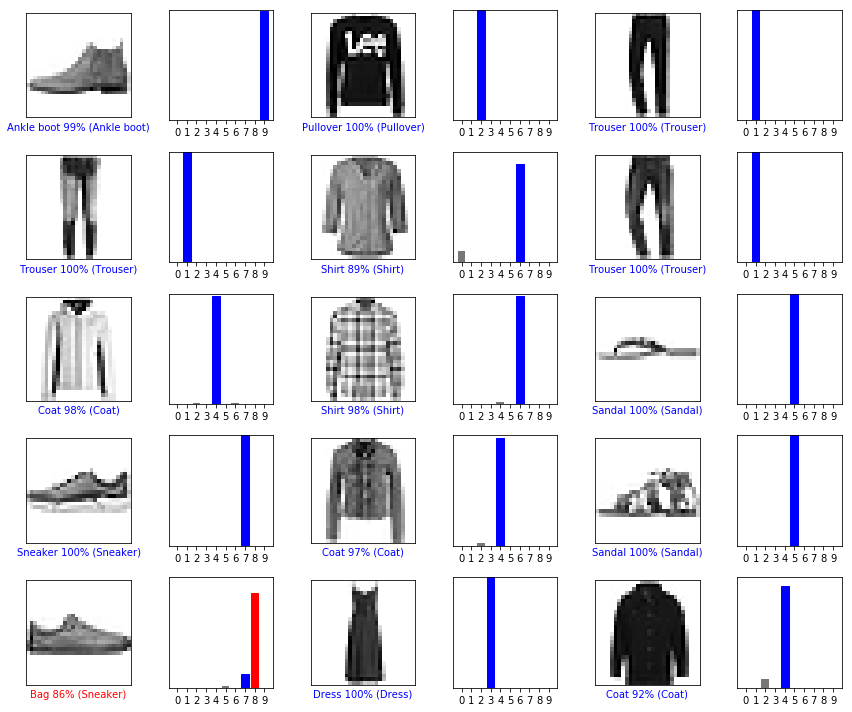

In [65]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [66]:
img = test_images[10]
print(img.shape)

(28, 28)


In [67]:
img = (np.expand_dims(img, 0))

prediction = probability_model.predict(img)
prediction_type = class_names[np.argmax(prediction)]

final_pred = "\nThis item is a {}".format(prediction_type)
print(final_pred)

plot_value_array(1, prediction[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)


This item is a Coat


This tutorial was taken from Tensorflow Core: 

https://www.tensorflow.org/tutorials/keras/classification